#### Model Building and Training for Diabetes Dataset

In [97]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [98]:
#Load the cleaned Dataset

df = pd.read_csv("cleaned_diabetes_data.csv")
df =df.drop(['Unnamed: 0'],axis=1)

In [99]:
df.shape

(640, 17)

In [100]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,55,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1
1,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,57,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1
4,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1


Dependent and Independent Features

In [101]:
X = df.drop(['class'],axis=1)
y = df['class']

In [102]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,55,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1
1,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,57,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0
4,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0


Splitting data to Test and Train

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
#Importing all the algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [105]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9453
- F1 score: 0.9452
- Precision: 0.9789
- Recall: 0.9098
- Roc Auc Score: 0.9452
----------------------------------
Model performance for Test set
- Accuracy: 0.9219
- F1 score: 0.9218
- Precision: 0.9661
- Recall: 0.8769
- Roc Auc Score: 0.9226


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- F1 score: 0.9844
- Precision: 1.0000
- Recall: 0.9692
- Roc Auc Score: 0.9846


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9922
- F1 score: 0.9922
- Precision: 1.0000
- Recall: 0.9846
- Roc Auc Score: 0.9923




Gradient Boost
Model performance for Training set
- Accuracy: 0.9961
- F1 score: 0.9961
- Precision: 1.0000
- Recall: 0.9922
- Roc Auc Score: 0.9961
----------------------------------
Model performance for Test set
- Accuracy: 0.9688
- F1 score: 0.9687
- Precision: 1.0000
- Recall: 0.9385
- Roc Auc Score: 0.9692


Adaboost
Model performance for Training set
- Accuracy: 0.9609
- F1 score: 0.9609
- Precision: 0.9719
- Recall: 0.9490
- Roc Auc Score: 0.9609
----------------------------------
Model performance for Test set
- Accuracy: 0.9375
- F1 score: 0.9375
- Precision: 0.9524
- Recall: 0.9231
- Roc Auc Score: 0.9377


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- F1 score: 0.9844
- Precision: 1.0000
- Recall: 0.9692
- Roc Auc Score: 0.9846




Random forest & XG Boost is giving us good results as per the below. Let's try to do hyperparameter tunning.
#### Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- F1 score: 0.9844
- Precision: 1.0000
- Recall: 0.9692
- Roc Auc Score: 0.9846
===================================

#### Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- F1 score: 0.9844
- Precision: 1.0000
- Recall: 0.9692
- Roc Auc Score: 0.9846
===================================

In [106]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [107]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("Xgboost", XGBClassifier(), xgboost_params)
                   
                   ]

In [108]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 8}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 200, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.4}


Retraining the Random Forest and Xgboost with best Parameters

In [109]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=5,max_depth=15),
    "Xgboost":XGBClassifier(n_estimators = 200, max_depth = 5, learning_rate =0.1, colsample_bytree =0.4)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- F1 score: 0.9844
- Precision: 1.0000
- Recall: 0.9692
- Roc Auc Score: 0.9846


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9922
- F1 score: 0.9922
- Precision: 1.0000
- Recall: 0.9846
- Roc Auc Score: 0.9923




We see that the XGBoost Classifier is performing better with hyperparameter tunning compared to Random Forest.

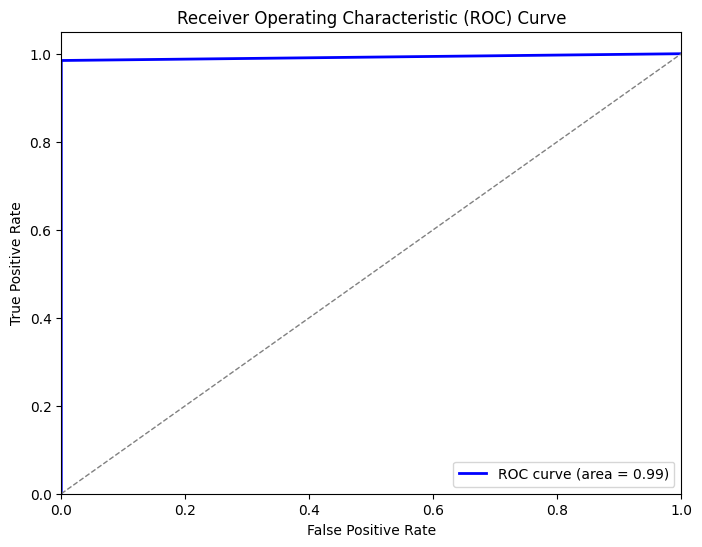

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Creating a Pickel File with the best model

In [111]:
# XGBoost Classifier model with the specified hyperparameters
model = XGBClassifier(n_estimators = 200, max_depth = 5, learning_rate =0.1, colsample_bytree =0.4)
model.fit(X_train, y_train)

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Testing it with random Data

In [112]:
data = {
    'Age': [40, 58, 41, 45, 60],
    'Gender': [1, 1, 1, 1, 1],
    'Polyuria': [0, 0, 1, 0, 1],
    'Polydipsia': [1, 0, 0, 0, 1],
    'sudden weight loss': [0, 0, 0, 1, 1],
    'weakness': [1, 1, 1, 1, 1],
    'Polyphagia': [0, 0, 1, 1, 1],
    'Genital thrush': [0, 0, 1, 1, 0],
    'visual blurring': [0, 1, 0, 0, 1],
    'Itching': [1, 0, 1, 1, 1],
    'Irritability': [0, 0, 0, 0, 1],
    'delayed healing': [1, 0, 1, 0, 1],
    'partial paresis': [0, 1, 0, 1, 1],
    'muscle stiffness': [1, 0, 1, 0, 1],
    'Alopecia': [1, 1, 1, 0, 1],
    'Obesity': [1, 0, 0, 0, 1]
}

df_test = pd.DataFrame(data)

In [113]:
# Load the pickled model from the file
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [114]:
predictions = model.predict(df_test)

In [116]:
print(f"The predictions from the input data is: {predictions}")

The predictions from the input data is: [1 1 1 0 1]
